### This notebook will be used for a capstone project called "Battle of Neighborhoods" stay tuned for daily updates to the notebook

In [1]:
import pandas as pd
import numpy as np
import geopy
import folium
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


### Read all the tables from Given URL for Canada Postal Codes, there are total 4 tables, first one is of our interest

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
len(df)

4

In [3]:
df1=df[0]

### We have the table in its raw form,

In [4]:
df1.head()

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park / Ontario Provincial Government,M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned


In [5]:
len(df1)

20

### Create an empty dataframe as desired

In [6]:
# define the dataframe columns
column_names = ['Postal Code', 'Bourough', 'Neighborhood'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
neighborhoods

,Postal Code,Bourough,Neighborhood


### Data wrangling to append the rows of empty dataframe from raw table

In [8]:
for j in range(df1.shape[1]):
    for i in range(len(df1)):
        if 'Not assigned' in df1.iloc[i,j]:
            continue
        else:
            pc = df1.iloc[i,j][:3]
            ne = df1.iloc[i,j].rsplit('(')[-1].replace(' /',',').replace(')','')
            br = df1.iloc[i,j][3:].rsplit('(')[0]
        
        neighborhoods = neighborhoods.append({'Postal Code': pc,
                                             'Bourough': br,
                                             'Neighborhood':ne},ignore_index=True)

In [9]:
neighborhoods.shape

(103, 3)

In [10]:
neighborhoods.head()

,Postal Code,Bourough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


### Read lats and longs from CSV file

In [11]:
lat_lon = pd.read_csv('http://cocl.us/Geospatial_data')

In [12]:
lat_lon.shape

(103, 3)

In [13]:
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Since the number Postal codes in lat_lon file and neighborhoods file are identical, lets sort both the data frames ascendingly and perform a simple assigning operation to get the final desired dataframe

In [14]:
neighborhoods.sort_values('Postal Code', inplace = True)
lat_lon.sort_values('Postal Code', inplace = True)

In [15]:
neighborhoods['Latitude'] = lat_lon['Latitude']
neighborhoods['Longitude'] = lat_lon['Longitude']
    
    

In [16]:
neighborhoods.head()

,Postal Code,Bourough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [17]:
# convert to list
neighborhoods['Neighborhood'] = neighborhoods['Neighborhood'].str.split(',')

In [18]:
neighborhoods.head()

,Postal Code,Bourough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"[Malvern, Rouge]",43.806686,-79.194353
1,M1C,Scarborough,"[Rouge Hill, Port Union, Highland Creek]",43.784535,-79.160497
2,M1E,Scarborough,"[Guildwood, Morningside, West Hill]",43.763573,-79.188711
3,M1G,Scarborough,[Woburn],43.770992,-79.216917
4,M1H,Scarborough,[Cedarbrae],43.773136,-79.239476


### Notice how we have multiple neigborhoods in a single row, lets split this column into multiple rows

In [19]:
# convert list of pd.Series then stack it
neighborhoods = (neighborhoods
 .set_index(['Postal Code','Bourough','Latitude','Longitude'])['Neighborhood']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_4', axis=1)
 .rename(columns={0:'Neighborhood'}))

In [20]:
neighborhoods.head()

,Postal Code,Bourough,Latitude,Longitude,Neighborhood
0,M1B,Scarborough,43.806686,-79.194353,Malvern
1,M1B,Scarborough,43.806686,-79.194353,Rouge
2,M1C,Scarborough,43.784535,-79.160497,Rouge Hill
3,M1C,Scarborough,43.784535,-79.160497,Port Union
4,M1C,Scarborough,43.784535,-79.160497,Highland Creek


In [21]:
neighborhoods.dtypes

Postal Code      object
Bourough         object
Latitude        float64
Longitude       float64
Neighborhood     object
dtype: object

### we can now plot neighborhoods on Map of Toronto, we'll start with getting the coordinates for Toronto and then plot neighborhoods

In [22]:
import geopy
add = 'Toronto, CA'

geolocator = geopy.Nominatim(user_agent='ca_explorer')
location = geolocator.geocode(add)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [23]:
import folium
map_toronto = folium.Map(location=[latitude,longitude], zoom_start=10)
#map_toronto

for lat, long, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'],neighborhoods['Bourough'],neighborhoods['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,long],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_opacity=0.5,
    parse_html=False).add_to(map_toronto)

map_toronto

In [24]:
CLIENT_ID = 'NASNCGAFXMETJBZFGGHCJPLLOPUI3R3WLJGT4UE1JX3OSTK3' # your Foursquare ID
CLIENT_SECRET = 'BS3GC01LJ45HURHWNWQKBCKCTMZQREH2ZMIK4SNTHN0QRHZS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Now lets try to use foursquare API to extract the near by restaurants for a neighborhood

In [25]:
neighborhood_latitude = neighborhoods.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[1, 'Longitude']
query = 'Food'
LIMIT = 100
radius = 500
categoryID = '4d4b7105d754a06374d81259'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&q={}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude,
    query,
    radius, 
    LIMIT,
    categoryID)
url

'https://api.foursquare.com/v2/venues/search?&client_id=NASNCGAFXMETJBZFGGHCJPLLOPUI3R3WLJGT4UE1JX3OSTK3&client_secret=BS3GC01LJ45HURHWNWQKBCKCTMZQREH2ZMIK4SNTHN0QRHZS&v=20180605&ll=43.806686299999996,-79.19435340000001&q=Food&radius=500&limit=100&categoryId=4d4b7105d754a06374d81259'

In [26]:
import requests
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5e7d2f9477af03001b94b45c'},
 'response': {'venues': [{'id': '517dcdb6f1363b7a770a8424',
    'name': "Meena's Fine Foods",
    'location': {'address': '1295 Morningside Avenue, Unit 22',
     'crossStreet': 'Sheppard Avenue East',
     'lat': 43.80447575837742,
     'lng': -79.19975280761719,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.80447575837742,
       'lng': -79.19975280761719}],
     'distance': 498,
     'postalCode': 'M1B 4Z4',
     'cc': 'CA',
     'city': 'Scarborough',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['1295 Morningside Avenue, Unit 22 (Sheppard Avenue East)',
      'Scarborough ON M1B 4Z4',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'prima

### Notice how the data we need is in response key of the returend JSON file

In [27]:
results = requests.get(url).json()["response"]['venues']


In [28]:
#https://foursquare.com/explore?mode=url&near=Toronto%2C%20ON%2C%20Canada&nearGeoId=72057594044095801&q=Food

In [29]:
neighborhoods.shape

(217, 5)

### Lets extract nearby restaurants for all the neighborhoods and make a new dataframe out of it

In [30]:
def getNearbyResto(names, latitudes, longitudes, radius=500, query='Food', categoryID = '4d4b7105d754a06374d81259'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&q={}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng,
        query,
        radius, 
        LIMIT,
        categoryID)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['pluralName']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
Toronto_restaurants = getNearbyResto(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

In [ ]:
Toronto_restaurants.head()

### Saving the new dataframe in a csv file, it is advisable to do that since we have a limited number of Foursquare API calls on a free account

In [ ]:
Toronto_restaurants.to_csv(r'C:\Users\parth\MIS 6V99 Applied Machine Learning\IBM Data Science Certificate\ML\Toronto_Resto.csv', index = False)

In [31]:
Toronto_restaurants = pd.read_csv(r'C:\Users\parth\MIS 6V99 Applied Machine Learning\IBM Data Science Certificate\ML\Toronto_Resto.csv')

In [32]:
Toronto_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Malvern,43.806686,-79.194353,Meena's Fine Foods,43.804476,-79.199753,Indian Restaurants
1,Malvern,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurants
2,Malvern,43.806686,-79.194353,Second Cup,43.802165,-79.196114,Coffee Shops
3,Rouge,43.806686,-79.194353,Meena's Fine Foods,43.804476,-79.199753,Indian Restaurants
4,Rouge,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurants


### Lets see how many restaurants we have for each neighborhood in our file

In [33]:
Toronto_restaurants.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adelaide,50,50,50,50,50,50
Agincourt North,19,19,19,19,19,19
Albion Gardens,38,38,38,38,38,38
Bathurst Quay,4,4,4,4,4,4
Beaumond Heights,38,38,38,38,38,38
Bloordale Gardens,5,5,5,5,5,5
Cabbagetown,48,48,48,48,48,48
Chinatown,50,50,50,50,50,50
Clairlea,9,9,9,9,9,9


### Okay, now lets check how many unique type of restaurant type there are in our data

In [34]:
print('There are {} uniques categories.'.format(len(Toronto_restaurants['Venue Category'].unique())))

There are 141 uniques categories.


### Now lets check top 20 most frequent occurences of restaurant types in Toronto

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
# Check top 20 most frequently occuring retaurant type
Toronto_t20=Toronto_restaurants.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)[:20].to_frame().reset_index()

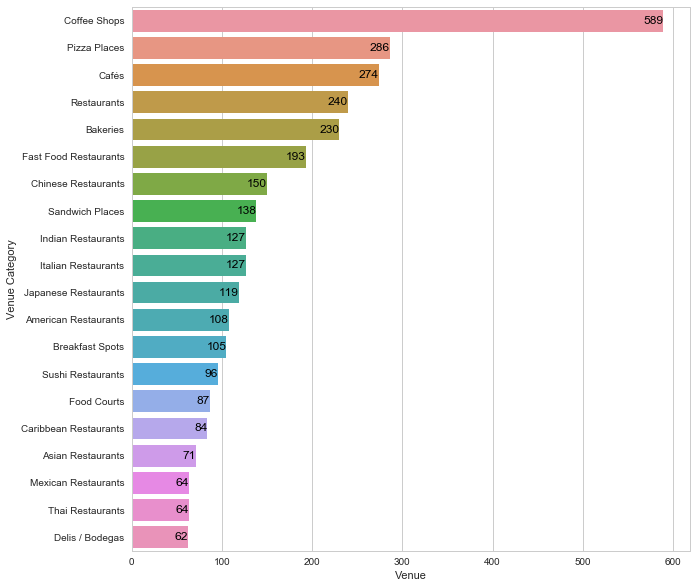

In [196]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='Venue', y='Venue Category', data=Toronto_t20)
#ax.annotate(x='Venue')
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), 
            fontsize=12, color='black', ha='right', va='center')

### For further analysis, we need to make categorical variable Venue category into binary values using one hot encoding

In [36]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighborhood,Afghan Restaurants,African Restaurants,American Restaurants,Argentinian Restaurants,Asian Restaurants,Australian Restaurants,BBQ Joints,Bagel Shops,Bakeries,...,Tapas Restaurants,Tea Rooms,Thai Restaurants,Theme Restaurants,Tibetan Restaurants,Turkish Restaurants,Vegetarian / Vegan Restaurants,Vietnamese Restaurants,Wine Bars,Wings Joints
0,Malvern,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Malvern,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Malvern,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rouge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rouge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
Toronto_onehot.shape

(4841, 142)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [38]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Afghan Restaurants,African Restaurants,American Restaurants,Argentinian Restaurants,Asian Restaurants,Australian Restaurants,BBQ Joints,Bagel Shops,Bakeries,...,Tapas Restaurants,Tea Rooms,Thai Restaurants,Theme Restaurants,Tibetan Restaurants,Turkish Restaurants,Vegetarian / Vegan Restaurants,Vietnamese Restaurants,Wine Bars,Wings Joints
0,Adelaide,0.000000,0.000000,0.060000,0.0,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.00,0.000000,0.020000,0.0,0.00,0.0,0.020000,0.000000,0.00,0.0
1,Agincourt North,0.000000,0.000000,0.000000,0.0,0.105263,0.000000,0.157895,0.000000,0.105263,...,0.00,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.0
2,Albion Gardens,0.026316,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.026316,0.131579,...,0.00,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.0
3,Bathurst Quay,0.000000,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.25,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.0
4,Beaumond Heights,0.026316,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.026316,0.131579,...,0.00,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.0
5,Bloordale Gardens,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.0
6,Cabbagetown,0.000000,0.000000,0.020833,0.0,0.000000,0.000000,0.041667,0.000000,0.020833,...,0.00,0.000000,0.041667,0.0,0.00,0.0,0.000000,0.000000,0.00,0.0
7,Chinatown,0.000000,0.000000,0.000000,0.0,0.020000,0.000000,0.000000,0.000000,0.020000,...,0.00,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.060000,0.02,0.0
8,Clairlea,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.222222,...,0.00,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.0
9,Cliffcrest,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.0


In [39]:
Toronto_grouped.shape

(200, 142)

### Further, lets find out top 10 most common restaurant types for each neighborhood

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)



In [42]:
neighborhoods_venues_sorted.head(11)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Coffee Shops,Food Courts,Restaurants,American Restaurants,Cafés,Ramen Restaurants,Bars,Fast Food Restaurants,Japanese Restaurants,Vegetarian / Vegan Restaurants
1,Agincourt North,Chinese Restaurants,BBQ Joints,Asian Restaurants,Bakeries,Fast Food Restaurants,Pizza Places,Dumpling Restaurants,Coffee Shops,Food Courts,Chinese Breakfast Places
2,Albion Gardens,Pizza Places,Bakeries,Caribbean Restaurants,Indian Restaurants,Sandwich Places,Fast Food Restaurants,Chinese Restaurants,Coffee Shops,Bubble Tea Shops,Food Trucks
3,Bathurst Quay,Coffee Shops,Bars,American Restaurants,Tapas Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners
4,Beaumond Heights,Pizza Places,Bakeries,Caribbean Restaurants,Indian Restaurants,Sandwich Places,Fast Food Restaurants,Chinese Restaurants,Coffee Shops,Bubble Tea Shops,Food Trucks
5,Bloordale Gardens,Pizza Places,Fried Chicken Joints,Coffee Shops,Mediterranean Restaurants,Cafés,Dessert Shops,Dumpling Restaurants,Donut Shops,Diners,Dim Sum Restaurants
6,Cabbagetown,Cafés,Coffee Shops,Pizza Places,Restaurants,Breakfast Spots,Chinese Restaurants,BBQ Joints,Japanese Restaurants,Thai Restaurants,Gastropubs
7,Chinatown,Coffee Shops,Chinese Restaurants,Cafés,Vietnamese Restaurants,Dumpling Restaurants,Bubble Tea Shops,Fast Food Restaurants,Pizza Places,Ramen Restaurants,Burger Joints
8,Clairlea,Ice Cream Shops,Diners,Bakeries,Restaurants,Chinese Restaurants,Indian Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops
9,Cliffcrest,American Restaurants,Wings Joints,Dim Sum Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dessert Shops


## Cluster Neighborhoods

In [43]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 3, 0, 3, 3, 3, 3, 3, 1])

In [44]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



### Now Lets merge the cluster labels with data set to get neighborhood and their clusters in a single dataframe

In [46]:
Toronto_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head() # check the last columns!

,Postal Code,Bourough,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,43.806686,-79.194353,Malvern,0.0,Indian Restaurants,Coffee Shops,Fast Food Restaurants,Wings Joints,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dim Sum Restaurants
1,M1B,Scarborough,43.806686,-79.194353,Rouge,0.0,Indian Restaurants,Coffee Shops,Fast Food Restaurants,Wings Joints,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dim Sum Restaurants
2,M1C,Scarborough,43.784535,-79.160497,Rouge Hill,3.0,Burger Joints,African Restaurants,Breakfast Spots,Diners,English Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops
3,M1C,Scarborough,43.784535,-79.160497,Port Union,3.0,Burger Joints,African Restaurants,Breakfast Spots,Diners,English Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops
4,M1C,Scarborough,43.784535,-79.160497,Highland Creek,3.0,Burger Joints,African Restaurants,Breakfast Spots,Diners,English Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops


In [59]:
Toronto_merged.head() # check the last columns!

,Postal Code,Bourough,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,43.806686,-79.194353,Malvern,0.0,Indian Restaurants,Coffee Shops,Fast Food Restaurants,Wings Joints,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dim Sum Restaurants
1,M1B,Scarborough,43.806686,-79.194353,Rouge,0.0,Indian Restaurants,Coffee Shops,Fast Food Restaurants,Wings Joints,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dim Sum Restaurants
2,M1C,Scarborough,43.784535,-79.160497,Rouge Hill,3.0,Burger Joints,African Restaurants,Breakfast Spots,Diners,English Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops
3,M1C,Scarborough,43.784535,-79.160497,Port Union,3.0,Burger Joints,African Restaurants,Breakfast Spots,Diners,English Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops
4,M1C,Scarborough,43.784535,-79.160497,Highland Creek,3.0,Burger Joints,African Restaurants,Breakfast Spots,Diners,English Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops


In [67]:
Toronto_merged.dropna(axis = 0, how ='any', inplace=True)

In [68]:
Toronto_merged['Cluster Labels']=Toronto_merged['Cluster Labels'].astype(int)

### Alright, time to viualize the clusters on map

In [69]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Lets examine each and every cluster and find out the number of indian restaurants in each

### Cluster 0

In [83]:
cluster0 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(4, Toronto_merged.shape[1]))]]

In [84]:
cluster0

,Bourough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,Malvern,0,Indian Restaurants,Coffee Shops,Fast Food Restaurants,Wings Joints,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dim Sum Restaurants
1,Scarborough,Rouge,0,Indian Restaurants,Coffee Shops,Fast Food Restaurants,Wings Joints,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dim Sum Restaurants
8,Scarborough,Woburn,0,Coffee Shops,Mexican Restaurants,Indian Restaurants,Korean Restaurants,Wings Joints,Diners,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops
27,Scarborough,Agincourt,0,Coffee Shops,Restaurants,Latin American Restaurants,Breakfast Spots,Sandwich Places,Korean Restaurants,Chinese Restaurants,Pakistani Restaurants,Cuban Restaurants,Cupcake Shops
39,North York,Fairview,0,Coffee Shops,Fast Food Restaurants,Restaurants,Food Courts,Japanese Restaurants,Bakeries,Chocolate Shops,Chinese Restaurants,Asian Restaurants,Indian Restaurants
40,North York,Henry Farm,0,Coffee Shops,Fast Food Restaurants,Restaurants,Food Courts,Japanese Restaurants,Bakeries,Chocolate Shops,Chinese Restaurants,Asian Restaurants,Indian Restaurants
41,North York,Oriole,0,Coffee Shops,Fast Food Restaurants,Restaurants,Food Courts,Japanese Restaurants,Bakeries,Chocolate Shops,Chinese Restaurants,Asian Restaurants,Indian Restaurants
58,North York,CFB Toronto,0,Food Courts,Snack Places,Empanada Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dim Sum Restaurants,Dessert Shops,Wings Joints
59,North York,DownsviewWest,0,Vietnamese Restaurants,Wings Joints,Asian Restaurants,Coffee Shops,American Restaurants,Ethiopian Restaurants,Coworking Spaces,Creperies,Cuban Restaurants,Cupcake Shops
86,Downtown Toronto,Rosedale,0,Coffee Shops,Food Trucks,Italian Restaurants,Wings Joints,Dim Sum Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners


In [137]:
Indian_resto_count_0=0
for i in range(3,len(cluster0.columns)):
    Indian_resto_count_0= Indian_resto_count_0 + cluster0[cluster0.columns[i]].str.count('Indian Restaurants').sum()
print('Indian Restaurants in Cluster 0 are ',Indian_resto_count_0)

Indian Restaurants in Cluster 0 are  6


In [138]:
print('Percentage of Indian restaurants in Cluster 0 is {0:.2f}%'.format((Indian_resto_count_0/cluster0.shape[0])*100))

Percentage of Indian restaurants in Cluster 0 is 13.64%


### Cluster 1

In [139]:
cluster1 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(4, Toronto_merged.shape[1]))]]

In [140]:
cluster1

,Bourough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Scarborough,Cliffside,1,American Restaurants,Wings Joints,Dim Sum Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dessert Shops
18,Scarborough,Cliffcrest,1,American Restaurants,Wings Joints,Dim Sum Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dessert Shops
19,Scarborough,Scarborough Village West,1,American Restaurants,Wings Joints,Dim Sum Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dessert Shops


In [141]:
Indian_resto_count_1=0
for i in range(3,len(cluster1.columns)):
    Indian_resto_count_1= Indian_resto_count_1 + cluster1[cluster1.columns[i]].str.count('Indian Restaurants').sum()
print('Indian Restaurants in Cluster 2 are ',Indian_resto_count_1)

Indian Restaurants in Cluster 0 are  0


### Cluster 2

In [142]:
cluster2 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(4, Toronto_merged.shape[1]))]]

In [144]:
cluster2

,Bourough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,North York,York Mills,2,Cafeterias,Wings Joints,Dim Sum Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dessert Shops,English Restaurants
44,North York,Silver Hills,2,Cafeterias,Wings Joints,Dim Sum Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dessert Shops,English Restaurants


In [145]:
Indian_resto_count_2=0
for i in range(3,len(cluster2.columns)):
    Indian_resto_count_2= Indian_resto_count_2 + cluster2[cluster2.columns[i]].str.count('Indian Restaurants').sum()
print('Indian Restaurants in Cluster 2 are ',Indian_resto_count_2)

Indian Restaurants in Cluster 2 are  0


### Cluster 3

In [146]:
cluster3 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(4, Toronto_merged.shape[1]))]]

In [147]:
cluster3

,Bourough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Scarborough,Rouge Hill,3,Burger Joints,African Restaurants,Breakfast Spots,Diners,English Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops
3,Scarborough,Port Union,3,Burger Joints,African Restaurants,Breakfast Spots,Diners,English Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops
4,Scarborough,Highland Creek,3,Burger Joints,African Restaurants,Breakfast Spots,Diners,English Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops
5,Scarborough,Guildwood,3,Restaurants,Greek Restaurants,Bakeries,Indian Restaurants,Fast Food Restaurants,Mexican Restaurants,Chinese Restaurants,Shawarma Places,Breakfast Spots,Pizza Places
6,Scarborough,Morningside,3,Restaurants,Greek Restaurants,Bakeries,Indian Restaurants,Fast Food Restaurants,Mexican Restaurants,Chinese Restaurants,Shawarma Places,Breakfast Spots,Pizza Places
7,Scarborough,West Hill,3,Restaurants,Greek Restaurants,Bakeries,Indian Restaurants,Fast Food Restaurants,Mexican Restaurants,Chinese Restaurants,Shawarma Places,Breakfast Spots,Pizza Places
9,Scarborough,Cedarbrae,3,Bakeries,Caribbean Restaurants,Burger Joints,Indian Restaurants,Cafés,South Indian Restaurants,Dessert Shops,Chinese Restaurants,Pizza Places,Fried Chicken Joints
10,Scarborough,Scarborough Village,3,Pizza Places,Caribbean Restaurants,Middle Eastern Restaurants,Wings Joints,Dessert Shops,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Dim Sum Restaurants
11,Scarborough,Kennedy Park,3,Chinese Restaurants,Indian Restaurants,Restaurants,Grocery Stores,Coffee Shops,Food Trucks,Bakeries,Filipino Restaurants,Wings Joints,Dumpling Restaurants
12,Scarborough,Ionview,3,Chinese Restaurants,Indian Restaurants,Restaurants,Grocery Stores,Coffee Shops,Food Trucks,Bakeries,Filipino Restaurants,Wings Joints,Dumpling Restaurants


In [150]:
Indian_resto_count_3=0
for i in range(3,len(cluster3.columns)):
    Indian_resto_count_3= Indian_resto_count_3 + cluster3[cluster3.columns[i]].str.count('Indian Restaurants').sum()
print('Indian Restaurants in Cluster 3 are ',Indian_resto_count_3)

Indian Restaurants in Cluster 3 are  43


In [151]:
print('Percentage of Indian restaurants in Cluster 3 is {0:.2f}%'.format((Indian_resto_count_3/cluster3.shape[0])*100))

Percentage of Indian restaurants in Cluster 3 is 30.28%


### Cluster 4

In [152]:
cluster4 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(4, Toronto_merged.shape[1]))]]

In [153]:
cluster4

,Bourough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
142,North York,North Park,4,Bakeries,Delis / Bodegas,Dim Sum Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Wings Joints
143,North York,Maple Leaf Park,4,Bakeries,Delis / Bodegas,Dim Sum Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Wings Joints
144,North York,Upwood Park,4,Bakeries,Delis / Bodegas,Dim Sum Restaurants,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Diners,Wings Joints
168,Etobicoke,Old Mill South,4,Breakfast Spots,Delis / Bodegas,Wings Joints,Diners,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Dim Sum Restaurants
169,Etobicoke,King's Mill Park,4,Breakfast Spots,Delis / Bodegas,Wings Joints,Diners,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Dim Sum Restaurants
170,Etobicoke,Sunnylea,4,Breakfast Spots,Delis / Bodegas,Wings Joints,Diners,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Dim Sum Restaurants
171,Etobicoke,Humber Bay,4,Breakfast Spots,Delis / Bodegas,Wings Joints,Diners,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Dim Sum Restaurants
172,Etobicoke,Mimico NE,4,Breakfast Spots,Delis / Bodegas,Wings Joints,Diners,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Dim Sum Restaurants
173,Etobicoke,The Queensway East,4,Breakfast Spots,Delis / Bodegas,Wings Joints,Diners,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Dim Sum Restaurants
174,Etobicoke,Royal York South East,4,Breakfast Spots,Delis / Bodegas,Wings Joints,Diners,Empanada Restaurants,Egyptian Restaurants,Eastern European Restaurants,Dumpling Restaurants,Donut Shops,Dim Sum Restaurants


In [154]:
Indian_resto_count_4=0
for i in range(3,len(cluster4.columns)):
    Indian_resto_count_4= Indian_resto_count_4 + cluster4[cluster4.columns[i]].str.count('Indian Restaurants').sum()
print('Indian Restaurants in Cluster 4 are ',Indian_resto_count_4)

Indian Restaurants in Cluster 4 are  0
